<a href="https://colab.research.google.com/github/chakatzib/MLA_JBG/blob/main/MLA1_JBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1
Joey
CS430
Machine Learning in the Cloud


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('weather_2012.csv')

In [4]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           8784 non-null   object 
 1   Temp (C)            8784 non-null   float64
 2   Dew Point Temp (C)  8784 non-null   float64
 3   Rel Hum (%)         8784 non-null   int64  
 4   Wind Spd (km/h)     8784 non-null   int64  
 5   Visibility (km)     8784 non-null   float64
 6   Stn Press (kPa)     8784 non-null   float64
 7   Weather             8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:

new_names = ['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']
df.columns = new_names
df.head()


,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [8]:

df.describe()


,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [10]:

df['temp_f'] = (df['temp_c'] * 9/5) + 32


In [11]:

cols = list(df.columns)
temp_f_index = cols.index('temp_f')
temp_c_index = cols.index('temp_c')

# Move temp_f before temp_c
cols.insert(temp_c_index, cols.pop(temp_f_index))

df = df[cols]
df.head()


,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


In [12]:

print(df.dtypes)


date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object


In [15]:

df['date_time'] = pd.to_datetime(df['date_time'])
print(df.dtypes)


date_time            datetime64[ns]
temp_f                      float64
temp_c                      float64
dew_point                   float64
relative_humidity             int64
wind_speed                    int64
visibility                  float64
pressure                    float64
weather                      object
dtype: object


In [16]:

monthly_avg = df.groupby(df['date_time'].dt.month)['temp_f'].mean()


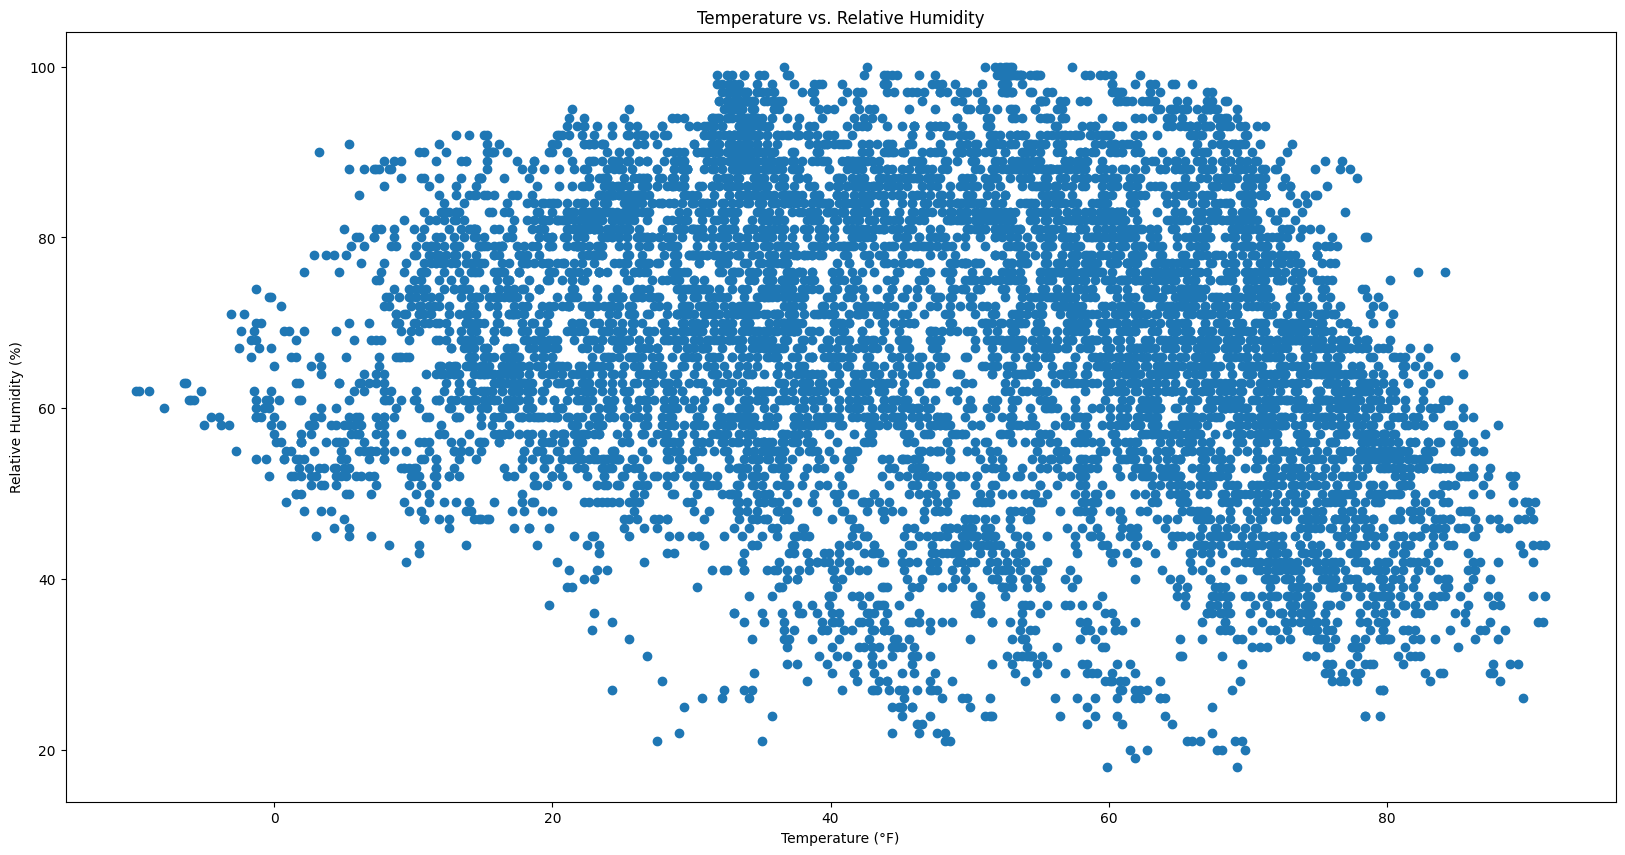

In [17]:

plt.figure(figsize=(20, 10))
plt.scatter(df['temp_f'], df['relative_humidity'])
plt.xlabel('Temperature (°F)')
plt.ylabel('Relative Humidity (%)')
plt.title('Temperature vs. Relative Humidity')
plt.show()


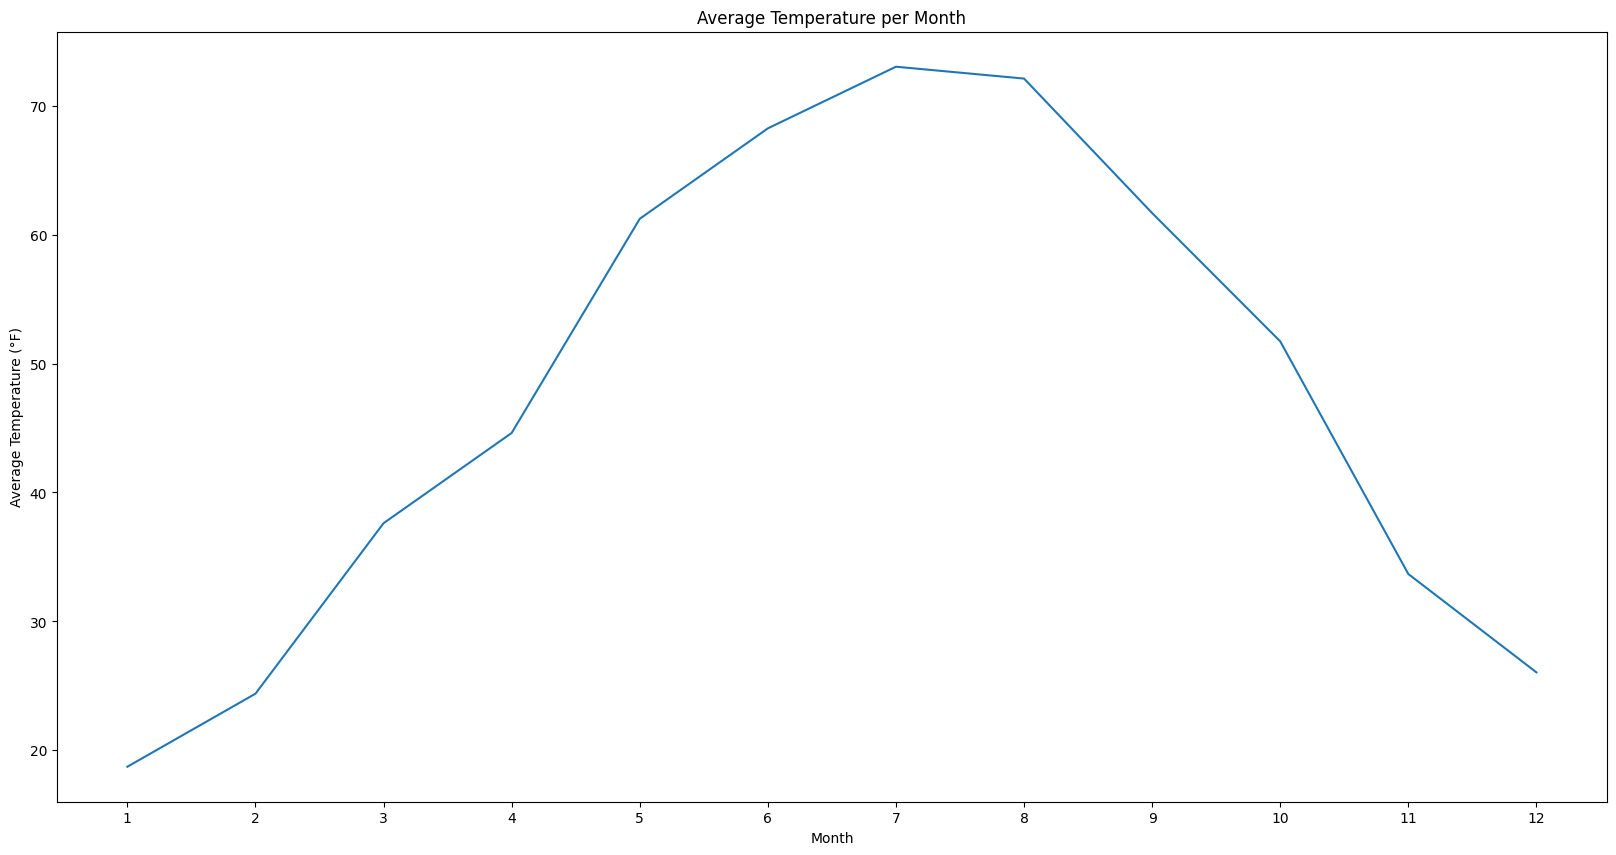

In [18]:

plt.figure(figsize=(20, 10))
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.title('Average Temperature per Month')
plt.xticks(monthly_avg.index)
plt.show()


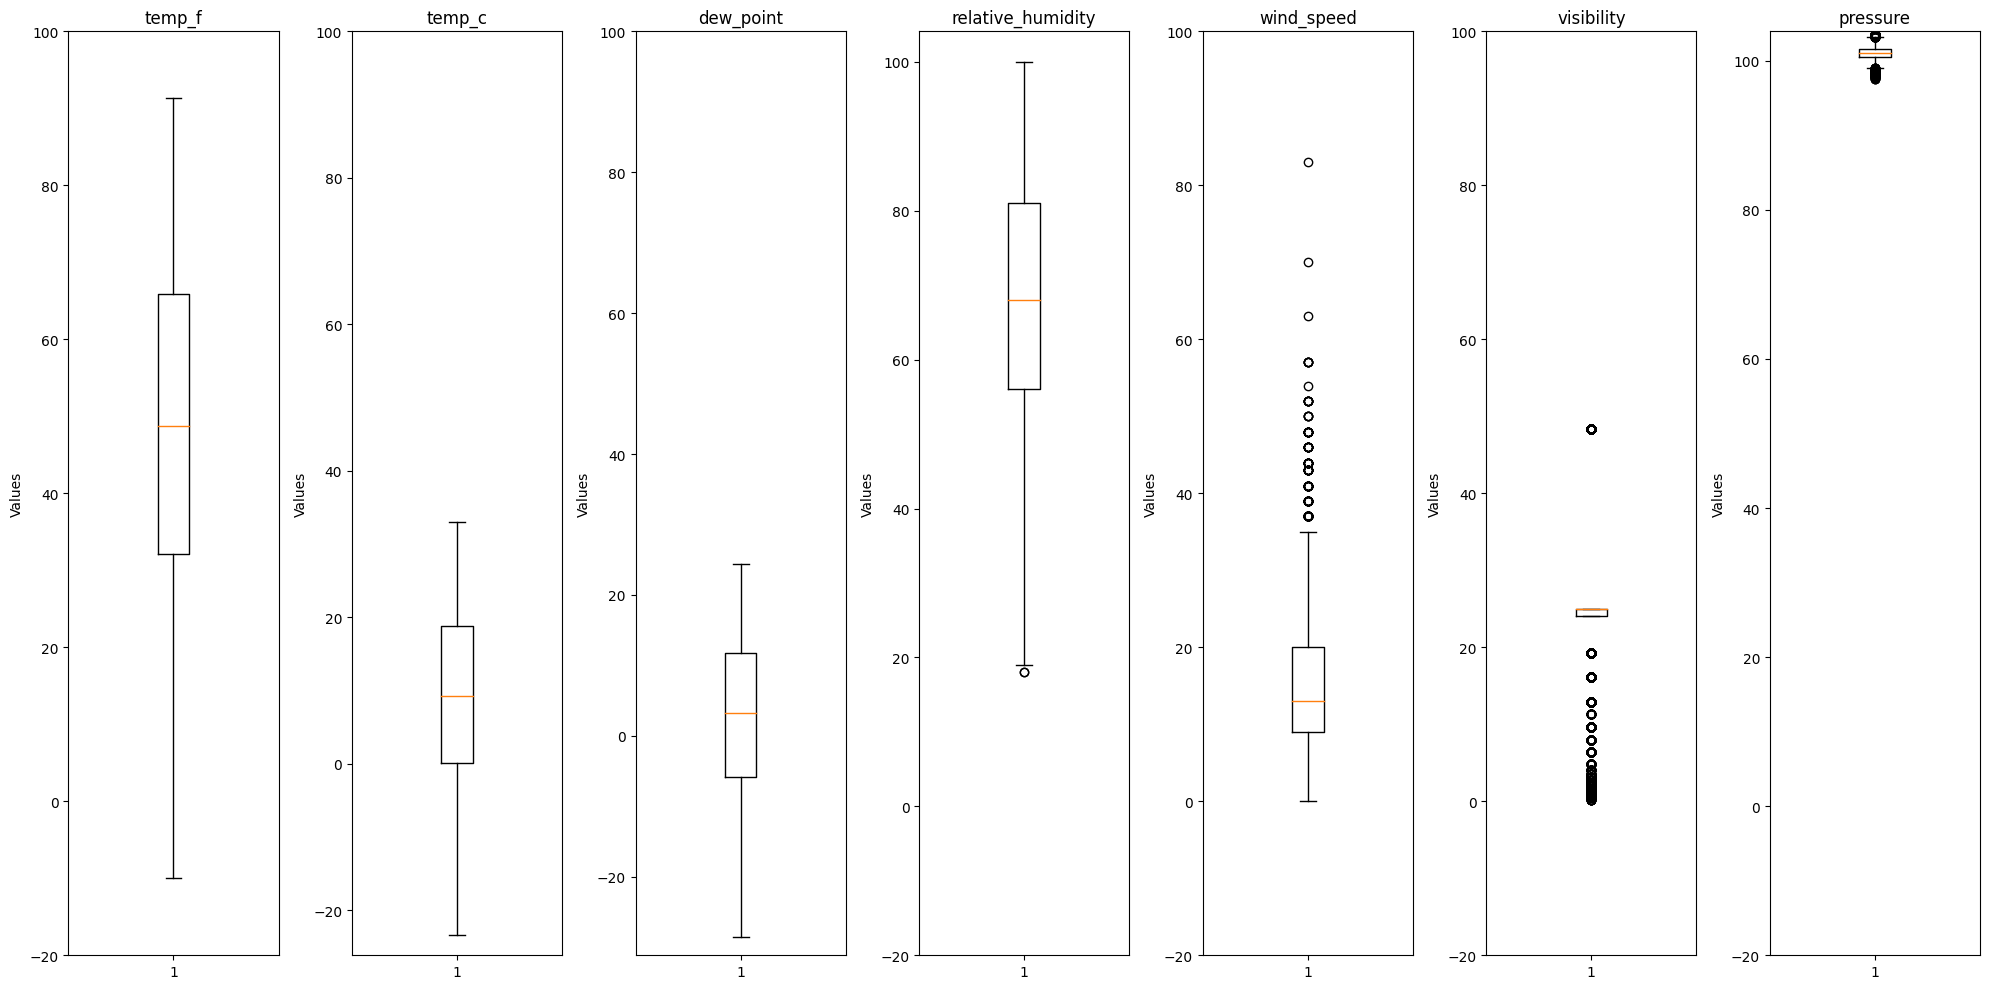

In [20]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
cols_to_plot = ['temp_f', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure']
for i, col in enumerate(cols_to_plot):
  plt.subplot(1, len(cols_to_plot), i + 1)
  plt.boxplot(df[col])
  plt.ylabel('Values')
  plt.title(col)
  plt.yticks(range(-20, 120, 20))

plt.tight_layout()
plt.show()
